# hypo3 - 고령인구, 고령화지수, 비율과 취업지원시설, 교육원과의 상관계수 구해보기

## import

In [81]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from matplotlib import rc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import googlemaps
import seaborn as sns
import os
import re
import time

if os.name == 'nt':
    print("This is a Windows environment.")
    rc('font', family='Malgun Gothic') 

elif os.name == 'posix':
    print("This is a Mac or Linux environment.")
    rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

This is a Mac or Linux environment.


In [82]:
crawling = pd.read_csv('./data/job_support_old_pop.csv', index_col=0)
crawling.head()

,FCLTY_NM,SIGNGU_NM,FCLTY_ROAD_NM_ADDR,LNM_ADDR,FCLTY_LA,FCLTY_LO
0,강남고령자취업알선센터(강남노인종합복지관),강남구,"서울 강남구 삼성로 628 (삼성동, 강남구청 삼성로 별관)","서울 강남구 삼성로 628 (삼성동, 강남구청 삼성로 별관)",37.516061,127.052123
1,강남구 일자리지원센터,강남구,"서울 강남구 학동로 426 (삼성동, 강남구청) 강남구청 본관1층","서울 강남구 학동로 426 (삼성동, 강남구청) 강남구청 본관1층",37.517507,127.047375
2,강동50플러스센터,강동구,"서울 강동구 올림픽로 752 (천호동, 강동50플러스센터)","서울 강동구 올림픽로 752 (천호동, 강동50플러스센터)",37.548206,127.127067
3,강동고령자취업알선센터(강동노인종합복지관),강동구,"서울 강동구 동남로71길 32-5 (명일동, 강동노인종합복지관)","서울 강동구 동남로71길 32-5 (명일동, 강동노인종합복지관)",37.551781,127.153070
4,강동구 일자리센터,강동구,"서울 강동구 성내로 25 (성내동, 강동구청) 본관 5층 일자리센터","서울 강동구 성내로 25 (성내동, 강동구청) 본관 5층 일자리센터",37.530122,127.123748


### job_support crawling

In [59]:
driver = webdriver.Chrome()
base_url = "https://goldenjob.or.kr/infor/support-organ.asp?tn=&keyfield=&keyword=&centerLocalArea_s=&p="

name_list = []
gu_list = []
addr_list = []

for page_number in range(1, 14):
    url = base_url+str(page_number)
    driver.get(url)
    results = driver.find_elements(By.CSS_SELECTOR, 'body > div.contents-wrap > section.contents.boardList_basic > div.inner.list_normal > table > tbody > tr')
    for result in results:
        name = result.text.split('\n')[0]
        name = re.sub(r'^\d+\s', '', name)
        gu = name.split(' ')[-1]
        addr = result.text.split('\n')[-1]
        
        name_list.append(name)
        gu_list.append(gu)
        addr_list.append(addr)
        
    time.sleep(2)
    
print(len(name_list), len(gu_list), len(addr_list))
print(name_list[:5], gu_list[:5], addr_list[:5])
driver.quit()

182 182 182
['강남고령자취업알선센터(강남노인종합복지관) 강남', '강남구 일자리지원센터 강남', '강동50플러스센터 강동', '강동고령자취업알선센터(강동노인종합복지관) 강동', '강동구 일자리센터 강동'] ['강남', '강남', '강동', '강동', '강동'] ['서울 강남구 삼성로 628 (삼성동, 강남구청 삼성로 별관) ', '서울 강남구 학동로 426 (삼성동, 강남구청) 강남구청 본관1층', '서울 강동구 올림픽로 752 (천호동, 강동50플러스센터) ', '서울 강동구 동남로71길 32-5 (명일동, 강동노인종합복지관) ', '서울 강동구 성내로 25 (성내동, 강동구청) 본관 5층 일자리센터']


In [60]:
name_list = [name[:-3] for name in name_list]

In [61]:
gu_list = [f"{gu}구" if gu != '중구' else gu for gu in gu_list]

In [62]:
len(name_list), len(gu_list), len(addr_list)

(182, 182, 182)

In [64]:
# crawling = pd.DataFrame(
#     data={
#         'FCLTY_NM' : name_list,
#         'SIGNGU_NM' : gu_list,
#         'FCLTY_ROAD_NM_ADDR' : addr_list,
#         'LNM_ADDR' : addr_list,
#         'FCLTY_LA' : np.nan,
#         'FCLTY_LO' : np.nan
#     }
# )
# crawling.head()

In [ ]:
# crawling.to_csv('./data/job_support_old_pop.csv', encoding='cp949')

## edu

In [83]:
edu = pd.read_csv('./data/KC_ODSN_CNTEDU_FCLTY_LIST_2023.csv')
edu.head()

,ESNTL_ID,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_CD,CTPRVN_NM,SIGNGU_CD,SIGNGU_NM,LEGALDONG_CD,LEGALDONG_NM,...,BULD_MANAGE_CD,TEL_NO,ZIP_NO,HMPG_URL,FCLTY_LA,FCLTY_LO,ORIGIN_NM,ADIT_DC,UPDT_DT,REGIST_DT
0,KCOEFPO23N000000001,문화시설,문화시설_교육_시니어,전남대학교용봉동캠퍼스평생교육원,29,광주광역시,29170,북구,2917010700,NaN,...,2917010700103000000024363,NaN,61186.0,NaN,35.179328,126.907701,공공데이터,-,20231231,20231231
1,KCOEFPO23N000000002,문화시설,문화시설_교육_시니어,고려대학교평생교육원,11,서울특별시,11290,성북구,1129013500,NaN,...,1129012500100010002039525,NaN,2841.0,NaN,37.590228,127.035858,공공데이터,-,20231231,20231231
2,KCOEFPO23N000000003,문화시설,문화시설_교육_시니어,서울여자대학교평생교육원,11,서울특별시,11350,노원구,1135010300,NaN,...,1135010300101260000014437,NaN,1797.0,NaN,37.627234,127.090297,공공데이터,-,20231231,20231231
3,KCOEFPO23N000000004,문화시설,문화시설_교육_시니어,광주가톨릭평생교육원본관,29,광주광역시,29140,서구,2914011800,NaN,...,2914011800109970001008995,NaN,61995.0,NaN,35.150379,126.868303,공공데이터,-,20231231,20231231
4,KCOEFPO23N000000005,문화시설,문화시설_교육_시니어,세종대학교평생교육원,11,서울특별시,11215,광진구,1121510900,NaN,...,1121510900100980000018572,NaN,5006.0,NaN,37.553244,127.073381,공공데이터,-,20231231,20231231


In [84]:
edu = edu[edu['CTPRVN_NM'] == '서울특별시']
edu.reset_index(drop=True, inplace=True)
edu.head()

,ESNTL_ID,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_CD,CTPRVN_NM,SIGNGU_CD,SIGNGU_NM,LEGALDONG_CD,LEGALDONG_NM,...,BULD_MANAGE_CD,TEL_NO,ZIP_NO,HMPG_URL,FCLTY_LA,FCLTY_LO,ORIGIN_NM,ADIT_DC,UPDT_DT,REGIST_DT
0,KCOEFPO23N000000002,문화시설,문화시설_교육_시니어,고려대학교평생교육원,11,서울특별시,11290,성북구,1129013500,NaN,...,1129012500100010002039525,NaN,2841.0,NaN,37.590228,127.035858,공공데이터,-,20231231,20231231
1,KCOEFPO23N000000003,문화시설,문화시설_교육_시니어,서울여자대학교평생교육원,11,서울특별시,11350,노원구,1135010300,NaN,...,1135010300101260000014437,NaN,1797.0,NaN,37.627234,127.090297,공공데이터,-,20231231,20231231
2,KCOEFPO23N000000005,문화시설,문화시설_교육_시니어,세종대학교평생교육원,11,서울특별시,11215,광진구,1121510900,NaN,...,1121510900100980000018572,NaN,5006.0,NaN,37.553244,127.073381,공공데이터,-,20231231,20231231
3,KCOEFPO23N000000006,문화시설,문화시설_교육_시니어,이화여자대학교평생교육원,11,서울특별시,11410,서대문구,1141011300,NaN,...,1141011300100330000024353,NaN,3765.0,NaN,37.562082,126.943160,공공데이터,-,20231231,20231231
4,KCOEFPO23N000000017,문화시설,문화시설_교육_시니어,서울과학기술대학교평생교육원,11,서울특별시,11350,노원구,1135010300,NaN,...,1135010300100780001000170,NaN,1811.0,NaN,37.630710,127.078560,공공데이터,-,20231231,20231231


In [85]:
edu.drop(columns=['LCLAS_NM', 'MLSFC_NM', 'ESNTL_ID', 'CTPRVN_NM', 'CTPRVN_CD', 'SIGNGU_CD', 'LEGALDONG_CD', 'ROAD_NM_CD' , 'TEL_NO', 'ZIP_NO',
                        'LEGALDONG_NM', 'ADDR_ENG_NM', 'ADSTRD_CD', 'BULD_NM', 'BULD_MANAGE_CD', 'HMPG_URL', 'ORIGIN_NM', 'ADIT_DC',
                        'UPDT_DT', 'REGIST_DT'], inplace=True)
edu.reset_index(drop=True, inplace=True)
edu.head()

,FCLTY_NM,SIGNGU_NM,FCLTY_ROAD_NM_ADDR,LNM_ADDR,FCLTY_LA,FCLTY_LO
0,고려대학교평생교육원,성북구,서울특별시 성북구 안암로 145 (안암동5가),서울특별시 성북구 안암동5가 1-2 고려대학교안암캠퍼스,37.590228,127.035858
1,서울여자대학교평생교육원,노원구,서울특별시 노원구 화랑로 621 (공릉동),서울특별시 노원구 공릉동 126 서울여자대학교,37.627234,127.090297
2,세종대학교평생교육원,광진구,서울특별시 광진구 능동로 209 (군자동),서울특별시 광진구 군자동 98 세종대학교,37.553244,127.073381
3,이화여자대학교평생교육원,서대문구,서울특별시 서대문구 성산로 508 (대신동),서울특별시 서대문구 대신동 33 이화삼성교육관,37.562082,126.943160
4,서울과학기술대학교평생교육원,노원구,서울특별시 노원구 공릉로 232 (공릉동),서울특별시 노원구 공릉동 172 서울과학기술대학교,37.630710,127.078560


In [86]:
edu.shape, crawling.shape

((195, 6), (182, 6))

## old-point

In [98]:
old_point = pd.read_excel('./data/자치구별+노령화지수(추계인구)_20240929181758.xlsx')
old_point.head()

,자치구별(1),자치구별(2),2023,2023.1,2023.2
0,자치구별(1),자치구별(2),합계,남자,여자
1,합계,소계,199.1,171.6,228.2
2,NaN,종로구,267.8,237.3,298
3,NaN,중구,286.5,245.3,329.3
4,NaN,용산구,200.7,172.2,230


In [99]:
old_point.drop(index=[0, 1], columns=["자치구별(1)"], inplace=True)
old_point.columns = ['구별', '합계', '남자', '여자']
old_point.reset_index(drop=True, inplace=True)
old_point = old_point.rename(columns={'구별' : 'SIGNGU_NM'})
old_point.head()

,SIGNGU_NM,합계,남자,여자
0,종로구,267.8,237.3,298
1,중구,286.5,245.3,329.3
2,용산구,200.7,172.2,230
3,성동구,193.4,167.5,219.9
4,광진구,211.1,183.7,240.1


### old-pop

In [122]:
old_pop = pd.read_excel('./data/자치구별+연령계층별+인구구성비(추계인구)_20241108190613.xlsx')
old_pop.head()

,자치구별(1),2023,2023.1,2023.2
0,자치구별(1),유소년인구,생산가능인구,고령인구
1,합계,9.1,72.8,18.1
2,종로구,7,74.1,18.9
3,중구,6.8,73.6,19.6
4,용산구,8.6,74.1,17.3


In [123]:
old_pop.drop(index=[0, 1], inplace=True)
old_pop.columns = ['구별', '유소년인구', '생산가능인구', '고령인구']
old_pop.reset_index(drop=True, inplace=True)
old_pop = old_pop.rename(columns={'구별' : 'SIGNGU_NM'})
old_pop.head()

,SIGNGU_NM,유소년인구,생산가능인구,고령인구
0,종로구,7,74.1,18.9
1,중구,6.8,73.6,19.6
2,용산구,8.6,74.1,17.3
3,성동구,8.9,73.8,17.3
4,광진구,7.7,76.1,16.2


### pop

In [131]:
pop = pd.read_excel('./data/자치구별+고령인구(추계인구)_20241019165325.xlsx')
pop.head()

/opt/anaconda3/envs/dev/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,자치구별(1),자치구별(2),2023,2023.1,2023.2
0,자치구별(1),자치구별(2),고령인구,고령인구,고령인구
1,자치구별(1),자치구별(2),소계,남자,여자
2,합계,소계,1691853,749118,942735
3,NaN,종로구,27187,11986,15201
4,NaN,중구,24374,10637,13737


In [132]:
pop.drop(index=[0, 1, 2], columns=['자치구별(1)'], inplace=True)
pop.columns = ["SIGNGU_NM", "노령인구_전체", "노령인구_남자", "노령인구_여자"]
pop.reset_index(drop=True, inplace=True)

### area

In [102]:
area = pd.read_excel('./data/행정구역(구별)_20241215143907.xlsx')
area.head()

/opt/anaconda3/envs/dev/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,자치구별(1),자치구별(2),2023,2023.1,2023.2,2023.3,2023.4,2023.5
0,자치구별(1),자치구별(2),면적,면적,동 (개),동 (개),통 (개),반 (개)
1,자치구별(1),자치구별(2),면적 (km²),구성비 (%),행정,법정,소계,소계
2,서울시,소계,605.2,100,426,467,12926,96663
3,NaN,종로구,23.91,3.95,17,87,279,1475
4,NaN,중구,9.96,1.65,15,74,256,1568


In [103]:
area.drop(columns='자치구별(1)', index=[0,2], inplace=True)
area.columns = area.loc[1, :]
area.drop(index=1, inplace=True)
area.reset_index(drop=True, inplace=True)
area.head()

1,자치구별(2),면적 (km²),구성비 (%),행정,법정,소계,소계
0,종로구,23.91,3.95,17,87,279,1475
1,중구,9.96,1.65,15,74,256,1568
2,용산구,21.87,3.61,16,36,357,2599
3,성동구,16.82,2.78,17,17,471,3645
4,광진구,17.06,2.82,15,7,370,3012


In [104]:
area.rename(columns={"자치구별(2)" : 'SIGNGU_NM'}, inplace=True)
area.head()

1,SIGNGU_NM,면적 (km²),구성비 (%),행정,법정,소계,소계
0,종로구,23.91,3.95,17,87,279,1475
1,중구,9.96,1.65,15,74,256,1568
2,용산구,21.87,3.61,16,36,357,2599
3,성동구,16.82,2.78,17,17,471,3645
4,광진구,17.06,2.82,15,7,370,3012


In [106]:
area = area[['SIGNGU_NM', '면적 (km²)', '구성비 (%)']]

### merge

In [138]:
concated_edu = pd.concat([edu, crawling])
concated_edu.shape, edu.shape, crawling.shape

((377, 6), (195, 6), (182, 6))

In [139]:
crawling

,FCLTY_NM,SIGNGU_NM,FCLTY_ROAD_NM_ADDR,LNM_ADDR,FCLTY_LA,FCLTY_LO
0,강남고령자취업알선센터(강남노인종합복지관),강남구,"서울 강남구 삼성로 628 (삼성동, 강남구청 삼성로 별관)","서울 강남구 삼성로 628 (삼성동, 강남구청 삼성로 별관)",37.516061,127.052123
1,강남구 일자리지원센터,강남구,"서울 강남구 학동로 426 (삼성동, 강남구청) 강남구청 본관1층","서울 강남구 학동로 426 (삼성동, 강남구청) 강남구청 본관1층",37.517507,127.047375
2,강동50플러스센터,강동구,"서울 강동구 올림픽로 752 (천호동, 강동50플러스센터)","서울 강동구 올림픽로 752 (천호동, 강동50플러스센터)",37.548206,127.127067
3,강동고령자취업알선센터(강동노인종합복지관),강동구,"서울 강동구 동남로71길 32-5 (명일동, 강동노인종합복지관)","서울 강동구 동남로71길 32-5 (명일동, 강동노인종합복지관)",37.551781,127.153070
4,강동구 일자리센터,강동구,"서울 강동구 성내로 25 (성내동, 강동구청) 본관 5층 일자리센터","서울 강동구 성내로 25 (성내동, 강동구청) 본관 5층 일자리센터",37.530122,127.123748
...,...,...,...,...,...,...
177,중장년일자리희망센터(전경련중소기업협력센터),마포구,"서울 마포구 성암로 330 (상암동, DMC첨단산업센터) 202호","서울 마포구 성암로 330 (상암동, DMC첨단산업센터) 202호",37.584866,126.885980
178,중장년일자리희망센터(한국경영혁신중소기업협회),중구,"서울 중구 삼일대로 363 (장교동, 장교빌딩) 장교빌딩2층","서울 중구 삼일대로 363 (장교동, 장교빌딩) 장교빌딩2층",37.567247,126.987174
179,한국노인인력개발원 서울지역본부,중구,"서울 중구 세종대로 17 (남대문로5가, WISE TOWER) 19층","서울 중구 세종대로 17 (남대문로5가, WISE TOWER) 19층",37.558563,126.974278
180,한국폴리텍대학(서울강서캠퍼스),강서구,"서울 강서구 우장산로10길 112 (화곡동, 한국폴리텍대학서울강서캠퍼스)","서울 강서구 우장산로10길 112 (화곡동, 한국폴리텍대학서울강서캠퍼스)",37.549868,126.842289


In [140]:
total_edu = concated_edu['SIGNGU_NM'].value_counts().sort_values(ascending=False).to_frame().reset_index()
edu1 = edu['SIGNGU_NM'].value_counts().sort_values(ascending=False).to_frame().reset_index()
craw1 = crawling['SIGNGU_NM'].value_counts().sort_values(ascending=False).to_frame().reset_index()

In [141]:
craw1.head()

,SIGNGU_NM,count
0,마포구,16
1,노원구,13
2,중구,9
3,강서구,9
4,영등포구,9


In [142]:
merged_edu = pd.merge(left=total_edu, right=area, left_on='SIGNGU_NM', right_on='SIGNGU_NM', how='left')
merged_edu = merged_edu.rename(columns={'count' : '총개수'})
merged_edu.head()

,SIGNGU_NM,총개수,면적 (km²),구성비 (%)
0,마포구,26,23.85,3.94
1,강남구,26,39.5,6.53
2,영등포구,25,24.55,4.06
3,서초구,23,46.97,7.76
4,구로구,22,20.12,3.32


In [143]:
merged_edu = merged_edu.merge(right=edu1, left_on='SIGNGU_NM', right_on="SIGNGU_NM")
merged_edu = merged_edu.rename(columns={'count' : '교육원개수'})
merged_edu = merged_edu.merge(right=craw1, left_on='SIGNGU_NM', right_on="SIGNGU_NM")
merged_edu = merged_edu.rename(columns={'count' : '지원시설개수'})

merged_edu

,SIGNGU_NM,총개수,면적 (km²),구성비 (%),교육원개수,지원시설개수
0,마포구,26,23.85,3.94,10,16
1,강남구,26,39.5,6.53,19,7
2,영등포구,25,24.55,4.06,16,9
3,서초구,23,46.97,7.76,16,7
4,구로구,22,20.12,3.32,15,7
5,노원구,21,35.44,5.86,8,13
6,종로구,19,23.91,3.95,14,5
7,송파구,16,33.88,5.6,8,8
8,성북구,15,24.58,4.06,8,7
9,동대문구,15,14.22,2.35,9,6


In [144]:
merged_edu['총개수비율'] = merged_edu['총개수'] / merged_edu['면적 (km²)']
merged_edu['교육원비율'] = merged_edu['교육원개수'] / merged_edu['면적 (km²)']
merged_edu['지원시설비율'] = merged_edu['지원시설개수'] / merged_edu['면적 (km²)']
merged_edu.head()

,SIGNGU_NM,총개수,면적 (km²),구성비 (%),교육원개수,지원시설개수,총개수비율,교육원비율,지원시설비율
0,마포구,26,23.85,3.94,10,16,1.090147,0.419287,0.67086
1,강남구,26,39.5,6.53,19,7,0.658228,0.481013,0.177215
2,영등포구,25,24.55,4.06,16,9,1.01833,0.651731,0.366599
3,서초구,23,46.97,7.76,16,7,0.489674,0.340643,0.149031
4,구로구,22,20.12,3.32,15,7,1.093439,0.745527,0.347913


In [145]:
old_point

,SIGNGU_NM,합계,남자,여자
0,종로구,267.8,237.3,298
1,중구,286.5,245.3,329.3
2,용산구,200.7,172.2,230
3,성동구,193.4,167.5,219.9
4,광진구,211.1,183.7,240.1
5,동대문구,234.7,203.3,267.7
6,중랑구,246.4,213.8,281
7,성북구,193.5,163.6,224.6
8,강북구,321.1,270.2,374.2
9,도봉구,278.5,238.7,321.5


In [146]:
merged_edu = merged_edu.merge(right=old_point, right_on='SIGNGU_NM', left_on='SIGNGU_NM')
merged_edu.rename(columns={'합계' : '고령화지수'})
merged_edu = merged_edu.merge(right=old_pop, right_on='SIGNGU_NM', left_on='SIGNGU_NM')
merged_edu = merged_edu.merge(right=pop, right_on='SIGNGU_NM', left_on='SIGNGU_NM')

merged_edu

,SIGNGU_NM,총개수,면적 (km²),구성비 (%),교육원개수,지원시설개수,총개수비율,교육원비율,지원시설비율,합계,남자,여자,유소년인구,생산가능인구,고령인구,노령인구_전체,노령인구_남자,노령인구_여자
0,마포구,26,23.85,3.94,10,16,1.090147,0.419287,0.67086,168.6,138.6,200.1,9.1,75.5,15.4,55169,23284,31885
1,강남구,26,39.5,6.53,19,7,0.658228,0.481013,0.177215,142.3,123.6,162.7,11.4,72.5,16.2,81561,36926,44635
2,영등포구,25,24.55,4.06,16,9,1.01833,0.651731,0.366599,210.7,184.9,238,8.4,73.8,17.8,70566,31807,38759
3,서초구,23,46.97,7.76,16,7,0.489674,0.340643,0.149031,131.4,116.2,147.5,12.4,71.4,16.2,62304,28287,34017
4,구로구,22,20.12,3.32,15,7,1.093439,0.745527,0.347913,224,198.5,250.7,8.8,71.4,19.8,82552,37410,45142
5,노원구,21,35.44,5.86,8,13,0.592551,0.225734,0.366817,196,161.5,232.9,9.6,71.5,18.9,92104,39197,52907
6,종로구,19,23.91,3.95,14,5,0.794647,0.585529,0.209118,267.8,237.3,298,7,74.1,18.9,27187,11986,15201
7,송파구,16,33.88,5.6,8,8,0.472255,0.236128,0.236128,145.8,130.5,161.9,11.2,72.4,16.4,104433,47988,56445
8,성북구,15,24.58,4.06,8,7,0.610252,0.325468,0.284784,193.5,163.6,224.6,9.3,72.6,18.1,77708,33505,44203
9,동대문구,15,14.22,2.35,9,6,1.054852,0.632911,0.421941,234.7,203.3,267.7,8,73.2,18.8,64397,28548,35849


In [147]:
merged_edu = merged_edu[['SIGNGU_NM', '총개수', '면적 (km²)', '구성비 (%)', '교육원개수', '지원시설개수', '총개수비율',
       '교육원비율', '지원시설비율', '합계', '고령인구', '노령인구_전체']]

merged_edu = merged_edu.rename(columns={'합계' : "고령화지수"})

merged_edu.head()

,SIGNGU_NM,총개수,면적 (km²),구성비 (%),교육원개수,지원시설개수,총개수비율,교육원비율,지원시설비율,고령화지수,고령인구,노령인구_전체
0,마포구,26,23.85,3.94,10,16,1.090147,0.419287,0.67086,168.6,15.4,55169
1,강남구,26,39.5,6.53,19,7,0.658228,0.481013,0.177215,142.3,16.2,81561
2,영등포구,25,24.55,4.06,16,9,1.01833,0.651731,0.366599,210.7,17.8,70566
3,서초구,23,46.97,7.76,16,7,0.489674,0.340643,0.149031,131.4,16.2,62304
4,구로구,22,20.12,3.32,15,7,1.093439,0.745527,0.347913,224,19.8,82552


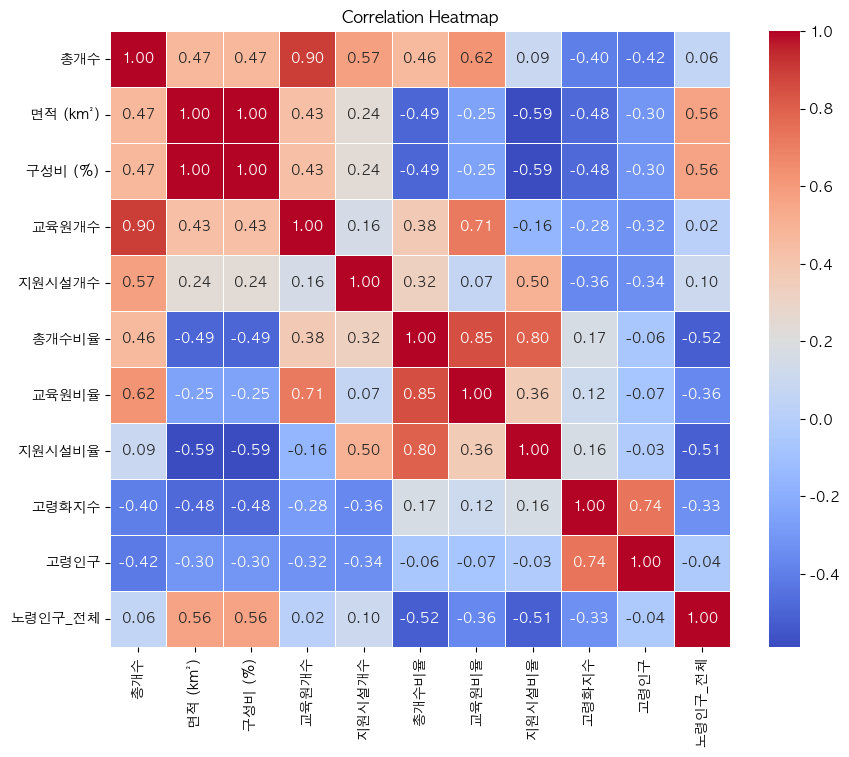

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 계산
correlation = merged_edu.iloc[:, 1:].corr()

# Heatmap 그리기
plt.figure(figsize=(10, 8))  # 그래프 크기 설정
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

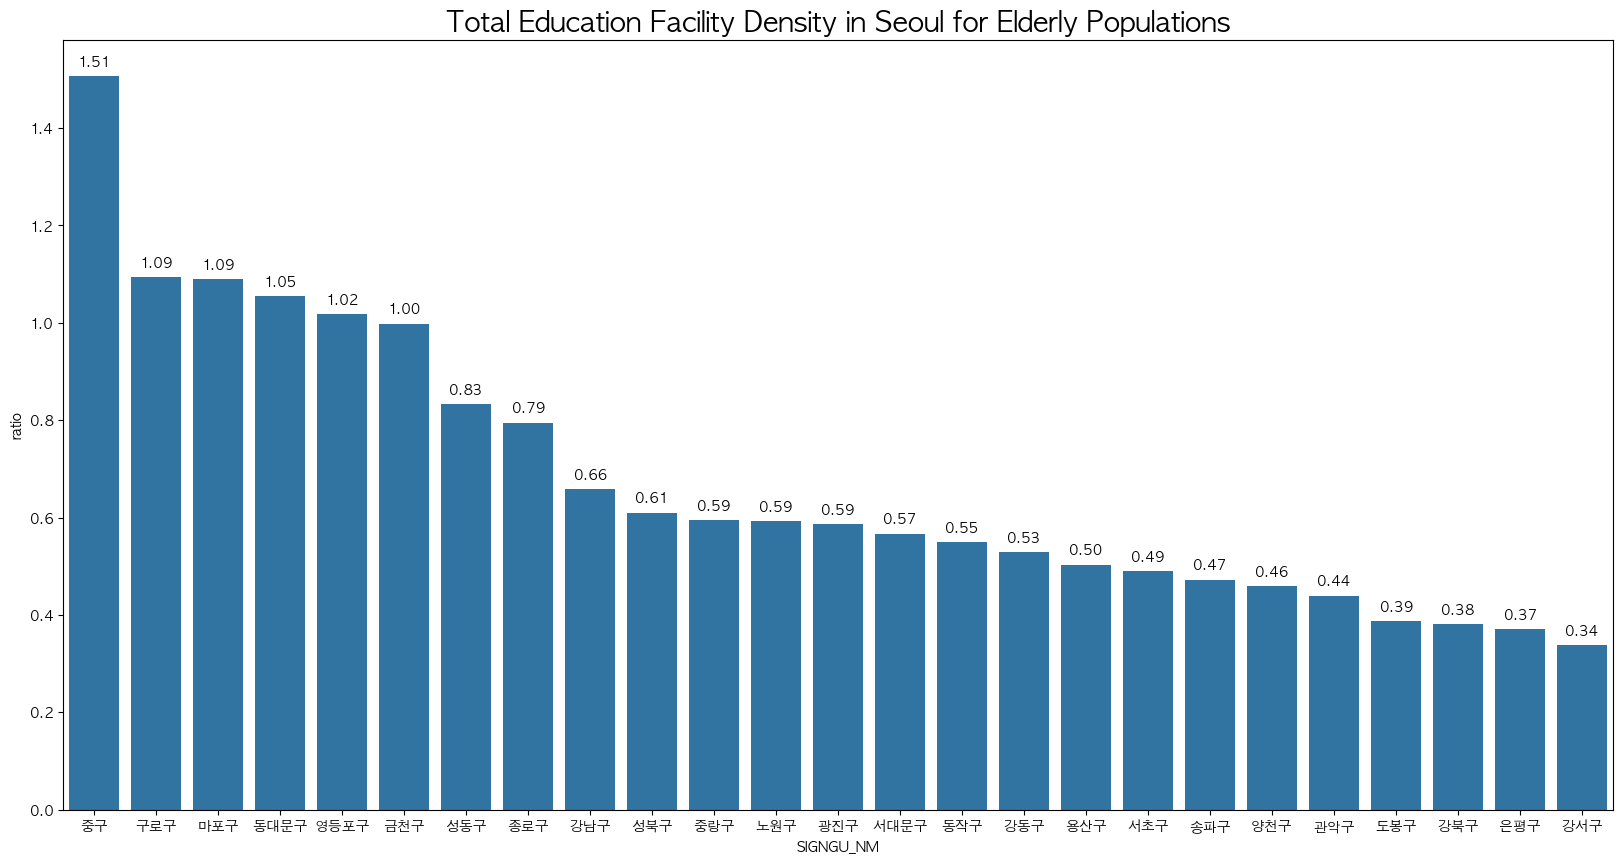

In [20]:
order = merged_edu.sort_values(by='ratio', ascending=False)['SIGNGU_NM'].values

plt.figure(figsize=(20, 10))
ax = sns.barplot(data=merged_edu, x='SIGNGU_NM', y='ratio', order=order)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # 소수점 두 자리까지만 표시
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title("Total Education Facility Density in Seoul for Elderly Populations", fontdict={'fontsize' : 20})
plt.show()

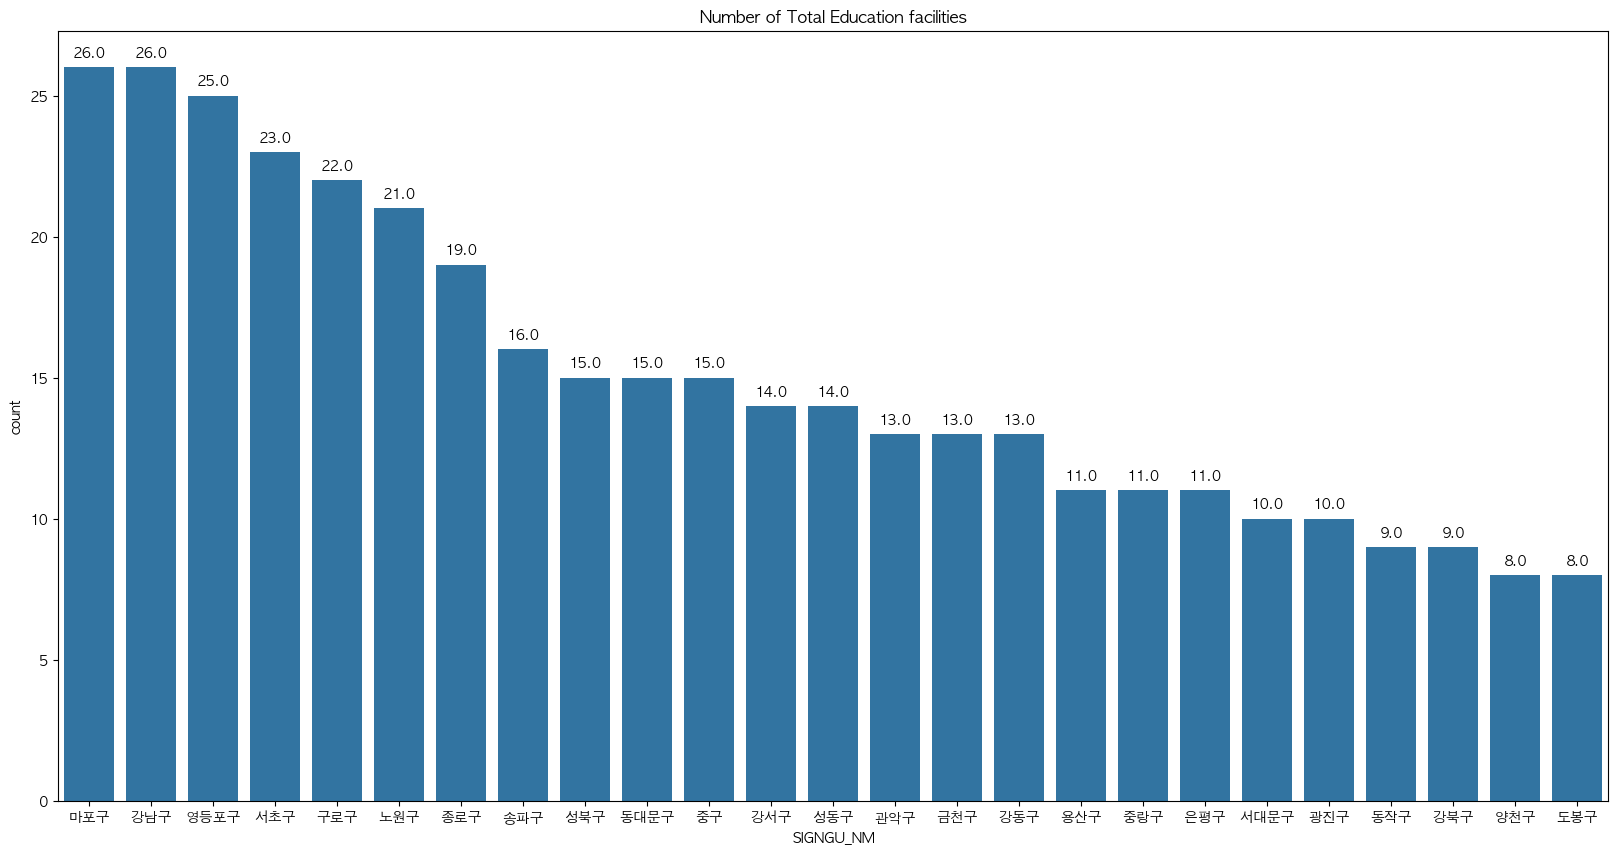

In [21]:
# SIGNGU_NM의 카테고리별 개수를 계산하고 오름차순으로 정렬
order = concated_edu['SIGNGU_NM'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(20, 10))
ax = sns.countplot(data=concated_edu, x='SIGNGU_NM', order=order)

# 값 레이블 추가
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title("Number of Total Education facilities")
plt.show()

### folium visualization

In [22]:
import folium
import json

In [26]:
m = folium.Map(location=[37.5821, 127.0146], zoom_start=11)

with open('./data/seoul_municipalities_geo_simple.json', 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

folium.GeoJson(
    geojson_data,
    name="GeoJSON Data"
).add_to(m)

for i, r in edu.iterrows():
    folium.Marker(
        location=[r['FCLTY_LA'], r['FCLTY_LO']],
        popup=f"<p>{r['FCLTY_NM']}</p>"
    ).add_to(m)
m.save('./Life_education.html')

In [27]:
m = folium.Map(location=[37.5821, 127.0146], zoom_start=11)

with open('./data/seoul_municipalities_geo_simple.json', 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

folium.GeoJson(
    geojson_data,
    name="GeoJSON Data"
).add_to(m)

for i, r in crawling.iterrows():
    folium.Marker(
        location=[r['FCLTY_LA'], r['FCLTY_LO']],
        popup=f"<p>{r['FCLTY_NM']}</p>"
    ).add_to(m)
m.save('./Support_job.html')

In [ ]:
m.save('map.html')

## 역의관계 살펴보기

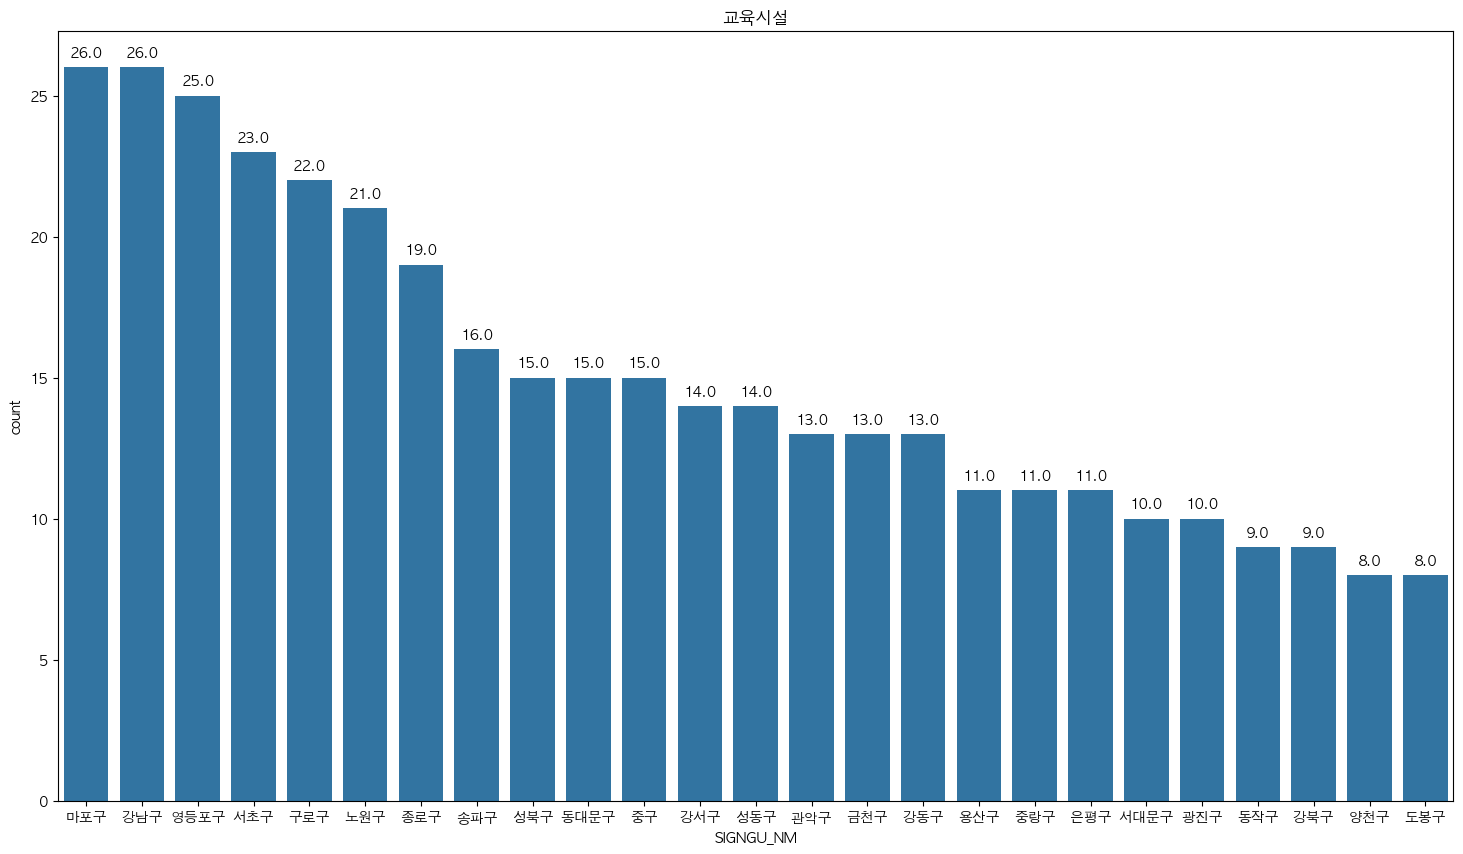

In [38]:
# SIGNGU_NM의 카테고리별 개수를 계산하고 오름차순으로 정렬
order = concated_edu['SIGNGU_NM'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(18, 10))
ax = sns.countplot(data=concated_edu, x='SIGNGU_NM', order=order)

# 값 레이블 추가
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title("교육시설")
plt.show()

* 강북구 => 9개, 도봉구 => 8개, 은평구 => 11개

In [39]:
merged_edu[(merged_edu['SIGNGU_NM'] == '강북구') | (merged_edu['SIGNGU_NM'] == '도봉구') | (merged_edu['SIGNGU_NM'] == '은평구')]

,SIGNGU_NM,count,면적 (km²),구성비 (%),ratio
18,은평구,11,29.71,4.91,0.370246
22,강북구,9,23.6,3.9,0.381356
24,도봉구,8,20.65,3.41,0.387409


In [40]:
merged_edu.sort_values(by='면적 (km²)', ascending=False)['SIGNGU_NM'].values

array(['서초구', '강서구', '강남구', '노원구', '송파구', '은평구', '관악구', '강동구', '성북구',
       '영등포구', '종로구', '마포구', '강북구', '용산구', '도봉구', '구로구', '중랑구', '서대문구',
       '양천구', '광진구', '성동구', '동작구', '동대문구', '금천구', '중구'], dtype=object)

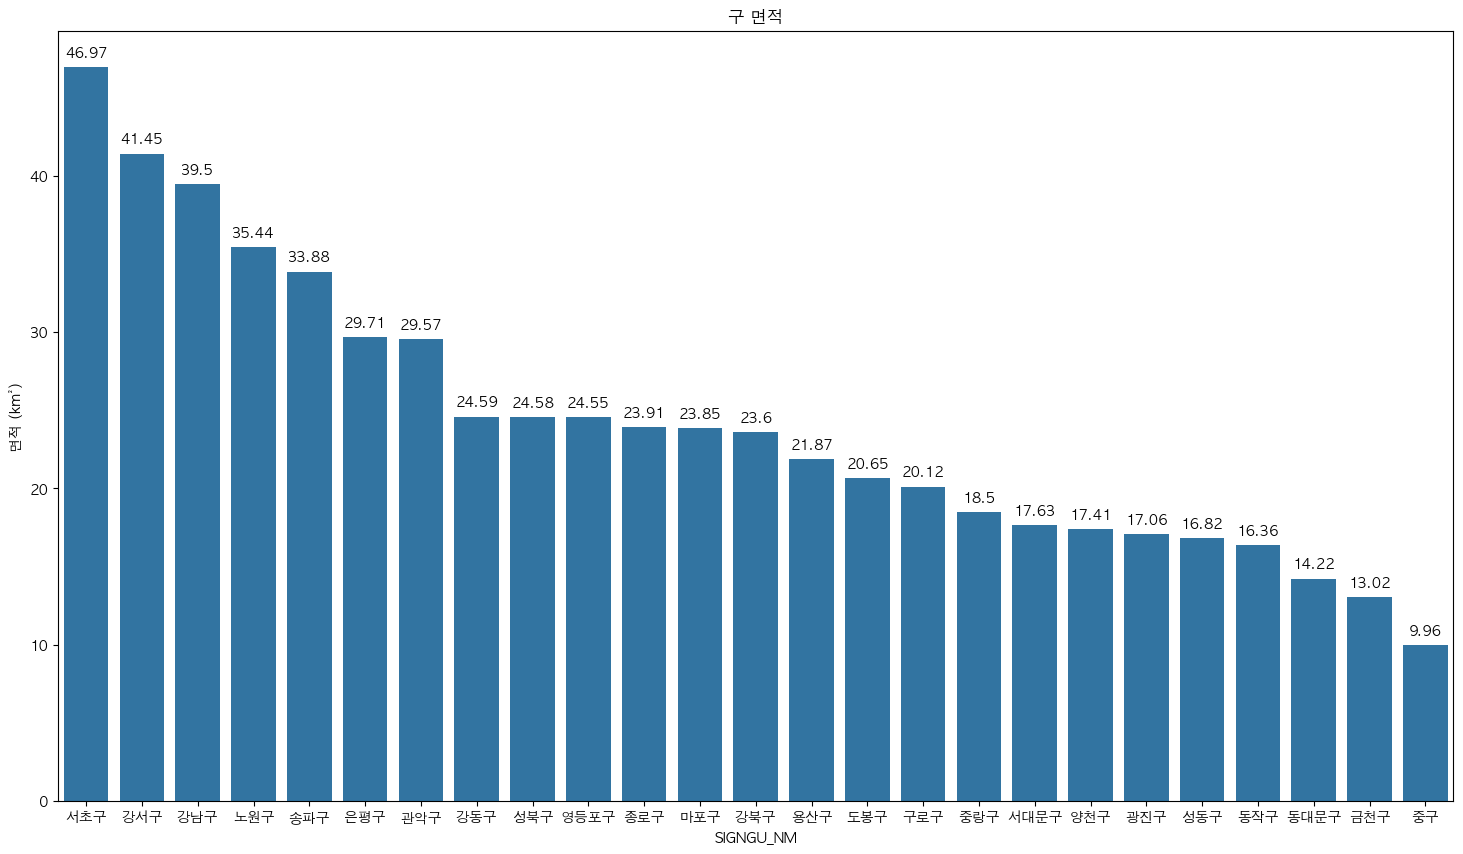

In [41]:
# SIGNGU_NM의 카테고리별 개수를 계산하고 오름차순으로 정렬
order = merged_edu.sort_values(by='면적 (km²)', ascending=False)['SIGNGU_NM'].values

plt.figure(figsize=(18, 10))
ax = sns.barplot(data=merged_edu, x='SIGNGU_NM', y='면적 (km²)', order=order)

# 값 레이블 추가
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title("구 면적")
plt.show()

In [42]:
merged_edu.sort_values(by='면적 (km²)', ascending=False)

,SIGNGU_NM,count,면적 (km²),구성비 (%),ratio
3,서초구,23,46.97,7.76,0.489674
11,강서구,14,41.45,6.85,0.337756
1,강남구,26,39.5,6.53,0.658228
5,노원구,21,35.44,5.86,0.592551
7,송파구,16,33.88,5.6,0.472255
18,은평구,11,29.71,4.91,0.370246
13,관악구,13,29.57,4.89,0.439635
15,강동구,13,24.59,4.06,0.52867
8,성북구,15,24.58,4.06,0.610252
2,영등포구,25,24.55,4.06,1.01833


In [43]:
concated_edu[concated_edu['SIGNGU_NM'] == '강북구']

,FCLTY_NM,SIGNGU_NM,FCLTY_ROAD_NM_ADDR,LNM_ADDR,FCLTY_LA,FCLTY_LO
87,이에듀케이션평생교육원,강북구,서울특별시 강북구 도봉로 325 (수유동),서울특별시 강북구 수유동 229-15 수성타워,37.637334,127.024365
142,글로벌평생교육원,강북구,서울특별시 강북구 덕릉로 99 (번동),서울특별시 강북구 번동 448-2 북한산드림캐슬,37.635028,127.024609
154,한길평생교육원,강북구,서울특별시 강북구 도봉로 229 (미아동),서울특별시 강북구 미아동 203-5,37.629079,127.024801
179,한교원격평생교육원,강북구,서울특별시 강북구 덕릉로 115 (번동),서울특별시 강북구 번동 443-113 승진빌딩,37.635134,127.026645
8,강북50플러스센터,강북구,"서울 강북구 오현로9길 49 (미아동, 강북50플러스센터)","서울 강북구 오현로9길 49 (미아동, 강북50플러스센터)",NaN,NaN
9,강북고령자취업알선센터(강북노인종합복지관),강북구,"서울 강북구 삼양로92길 40 (수유동, 강북노인종합복지관)","서울 강북구 삼양로92길 40 (수유동, 강북노인종합복지관)",NaN,NaN
10,강북구 일자리플러스센터,강북구,"서울 강북구 도봉로89길 13 (수유동, 강북구청) 본관 1층","서울 강북구 도봉로89길 13 (수유동, 강북구청) 본관 1층",NaN,NaN
11,강북여성인력개발센터,강북구,"서울 강북구 덕릉로 108 (미아동, 현웅빌딩) 3층","서울 강북구 덕릉로 108 (미아동, 현웅빌딩) 3층",NaN,NaN
47,대한노인회 강북구지회,강북구,"서울 강북구 삼양로 280-1 (미아동, 강북노인회관) 3층","서울 강북구 삼양로 280-1 (미아동, 강북노인회관) 3층",NaN,NaN


In [44]:
concated_edu[concated_edu['SIGNGU_NM'] == '도봉구']

,FCLTY_NM,SIGNGU_NM,FCLTY_ROAD_NM_ADDR,LNM_ADDR,FCLTY_LA,FCLTY_LO
94,넥스트원격평생교육원,도봉구,서울특별시 도봉구 도봉로110나길 49 (창동),서울특별시 도봉구 창동 659-4 삼우빌딩,37.648314,127.035444
155,한일평생교육원,도봉구,서울특별시 도봉구 도봉로 911 (도봉동),서울특별시 도봉구 도봉동 560-14,37.685746,127.045684
54,대한노인회 도봉구지회,도봉구,서울 도봉구 마들로 536 (창동) 4층,서울 도봉구 마들로 536 (창동) 4층,NaN,NaN
72,도봉고령자취업알선센터(도봉노인종합복지관),도봉구,"서울 도봉구 도당로2길 12-13 (쌍문동, 시립도봉노인종합복지관)","서울 도봉구 도당로2길 12-13 (쌍문동, 시립도봉노인종합복지관)",NaN,NaN
73,도봉구 일자리플러스센터,도봉구,"서울 도봉구 마들로 656 (방학동, 도봉구청) 본관 1층","서울 도봉구 마들로 656 (방학동, 도봉구청) 본관 1층",NaN,NaN
74,도봉시니어클럽,도봉구,"서울 도봉구 도당로 118 (방학동, 거성학마을아파트) 3층","서울 도봉구 도당로 118 (방학동, 거성학마을아파트) 3층",NaN,NaN
75,도봉여성센터-도봉새일센터,도봉구,"서울 도봉구 방학로12길 28 (방학동, 도봉여성센터, 보육정보센터)","서울 도봉구 방학로12길 28 (방학동, 도봉여성센터, 보육정보센터)",NaN,NaN
116,서울시50플러스 북부캠퍼스,도봉구,"서울 도봉구 마들로13길 84 (창동, 창동 아우르네)","서울 도봉구 마들로13길 84 (창동, 창동 아우르네)",NaN,NaN


In [45]:
concated_edu[concated_edu['SIGNGU_NM'] == '은평구']

,FCLTY_NM,SIGNGU_NM,FCLTY_ROAD_NM_ADDR,LNM_ADDR,FCLTY_LA,FCLTY_LO
41,한양건축평생교육원,은평구,서울특별시 은평구 서오릉로 110 (대조동),서울특별시 은평구 대조동 172-56 삼두빌딩,37.609865,126.920136
91,한국직업능력평생교육원,은평구,서울특별시 은평구 통일로 719 (대조동),서울특별시 은평구 대조동 14-13,37.609930,126.930148
104,중앙독립문평생교육원,은평구,서울특별시 은평구 통일로87길 19-1 (갈현동),서울특별시 은평구 갈현동 425-3,37.623351,126.917413
127,으뜸원격평생교육원,은평구,서울특별시 은평구 통일로 876 (불광동),서울특별시 은평구 불광동 484-78,37.621176,126.920249
66,대한노인회 은평구지회,은평구,서울 은평구 백련산로 159-3 (응암동) 2층,서울 은평구 백련산로 159-3 (응암동) 2층,NaN,NaN
113,서울시50+서부캠퍼스,은평구,"서울 은평구 통일로62길 7 (녹번동, 서울기록원)","서울 은평구 통일로62길 7 (녹번동, 서울기록원)",NaN,NaN
158,은평고령자취업알선센터(은평노인종합복지관),은평구,"서울 은평구 연서로 415 (진관동, 은평노인종합복지관)","서울 은평구 연서로 415 (진관동, 은평노인종합복지관)",NaN,NaN
159,은평구 일자리플러스센터,은평구,"서울 은평구 은평로 195 (녹번동, 은평구청) 본관 2층","서울 은평구 은평로 195 (녹번동, 은평구청) 본관 2층",NaN,NaN
160,은평시니어클럽,은평구,서울 은평구 증산로23길 7 (신사동),서울 은평구 증산로23길 7 (신사동),NaN,NaN
161,은평어르신일자리센터,은평구,서울 은평구 증산로23길 7 (신사동) 4층,서울 은평구 증산로23길 7 (신사동) 4층,NaN,NaN


In [46]:
old_pop = pd.read_excel('./data/자치구별+연령계층별+인구구성비(추계인구)_20241108190613.xlsx')
old_pop.head()

,자치구별(1),2023,2023.1,2023.2
0,자치구별(1),유소년인구,생산가능인구,고령인구
1,합계,9.1,72.8,18.1
2,종로구,7,74.1,18.9
3,중구,6.8,73.6,19.6
4,용산구,8.6,74.1,17.3


In [47]:
old_pop.drop(index=[0, 1], inplace=True)
old_pop.columns = ['구별', '유소년인구', '생산가능인구', '고령인구']
old_pop.reset_index(drop=True, inplace=True)
old_pop.head()

,구별,유소년인구,생산가능인구,고령인구
0,종로구,7,74.1,18.9
1,중구,6.8,73.6,19.6
2,용산구,8.6,74.1,17.3
3,성동구,8.9,73.8,17.3
4,광진구,7.7,76.1,16.2


In [48]:
old_pop[(old_pop['구별'] == "은평구") | (old_pop['구별'] == "도봉구") | (old_pop['구별'] == "강북구")]

,구별,유소년인구,생산가능인구,고령인구
8,강북구,7.2,69.6,23.2
9,도봉구,8.1,69.3,22.6
11,은평구,8.9,71.2,19.9


In [49]:
old_pop.sort_values(by='고령인구', ascending=False)

,구별,유소년인구,생산가능인구,고령인구
8,강북구,7.2,69.6,23.2
9,도봉구,8.1,69.3,22.6
6,중랑구,8.1,71.9,20
11,은평구,8.9,71.2,19.9
16,구로구,8.8,71.4,19.8
1,중구,6.8,73.6,19.6
0,종로구,7,74.1,18.9
10,노원구,9.6,71.5,18.9
17,금천구,6.9,74.2,18.8
5,동대문구,8,73.2,18.8


### 평생교육원 데이터만 확인해보기

In [50]:
edu_count2 = edu["SIGNGU_NM"].value_counts().to_frame().reset_index()

In [51]:
merged_edu2 = pd.merge(left=edu_count2, right=area, left_on='SIGNGU_NM', right_on='구별', how='left')
merged_edu2.drop(columns='구별', inplace=True)
merged_edu2.head()

,SIGNGU_NM,count,면적 (km²),구성비 (%)
0,강남구,19,39.5,6.53
1,영등포구,16,24.55,4.06
2,서초구,16,46.97,7.76
3,구로구,15,20.12,3.32
4,종로구,14,23.91,3.95


In [52]:
merged_edu2['ratio'] = merged_edu2['count'] / merged_edu2['면적 (km²)']
merged_edu2.head()

,SIGNGU_NM,count,면적 (km²),구성비 (%),ratio
0,강남구,19,39.5,6.53,0.481013
1,영등포구,16,24.55,4.06,0.651731
2,서초구,16,46.97,7.76,0.340643
3,구로구,15,20.12,3.32,0.745527
4,종로구,14,23.91,3.95,0.585529


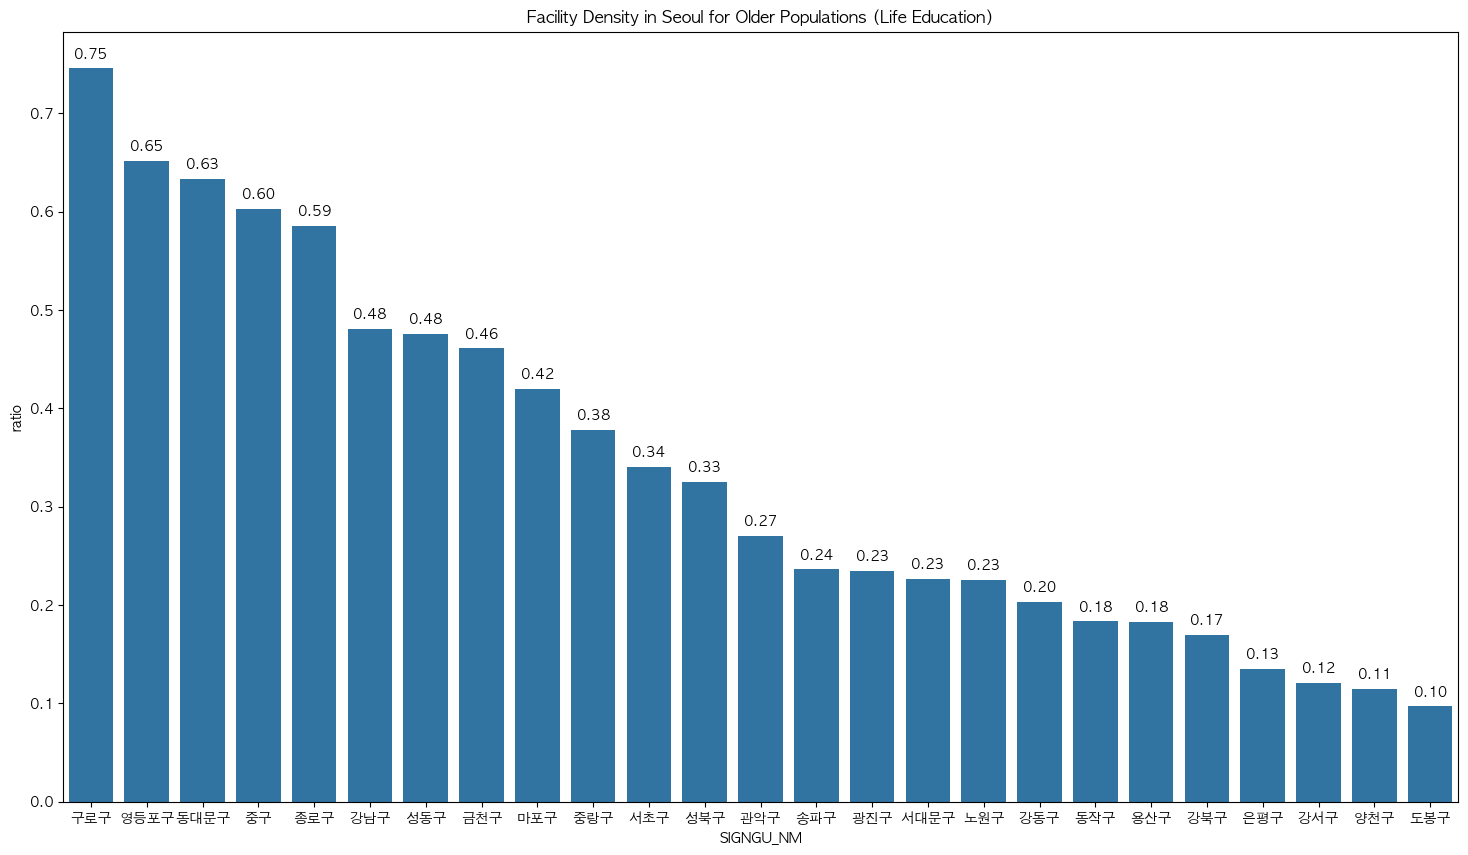

In [53]:
order = merged_edu2.sort_values(by='ratio', ascending=False)['SIGNGU_NM'].values

plt.figure(figsize=(18, 10))
ax = sns.barplot(data=merged_edu2, x='SIGNGU_NM', y='ratio', order=order)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # 소수점 두 자리까지만 표시
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title("Facility Density in Seoul for Older Populations (Life Education)")
plt.show()

In [54]:
merged_edu2

,SIGNGU_NM,count,면적 (km²),구성비 (%),ratio
0,강남구,19,39.5,6.53,0.481013
1,영등포구,16,24.55,4.06,0.651731
2,서초구,16,46.97,7.76,0.340643
3,구로구,15,20.12,3.32,0.745527
4,종로구,14,23.91,3.95,0.585529
5,마포구,10,23.85,3.94,0.419287
6,동대문구,9,14.22,2.35,0.632911
7,성북구,8,24.58,4.06,0.325468
8,관악구,8,29.57,4.89,0.270544
9,송파구,8,33.88,5.6,0.236128


In [55]:
edu

,FCLTY_NM,SIGNGU_NM,FCLTY_ROAD_NM_ADDR,LNM_ADDR,FCLTY_LA,FCLTY_LO
0,고려대학교평생교육원,성북구,서울특별시 성북구 안암로 145 (안암동5가),서울특별시 성북구 안암동5가 1-2 고려대학교안암캠퍼스,37.590228,127.035858
1,서울여자대학교평생교육원,노원구,서울특별시 노원구 화랑로 621 (공릉동),서울특별시 노원구 공릉동 126 서울여자대학교,37.627234,127.090297
2,세종대학교평생교육원,광진구,서울특별시 광진구 능동로 209 (군자동),서울특별시 광진구 군자동 98 세종대학교,37.553244,127.073381
3,이화여자대학교평생교육원,서대문구,서울특별시 서대문구 성산로 508 (대신동),서울특별시 서대문구 대신동 33 이화삼성교육관,37.562082,126.943160
4,서울과학기술대학교평생교육원,노원구,서울특별시 노원구 공릉로 232 (공릉동),서울특별시 노원구 공릉동 172 서울과학기술대학교,37.630710,127.078560
...,...,...,...,...,...,...
190,위너평생교육원,송파구,서울특별시 송파구 법원로11길 7 (문정동),서울특별시 송파구 문정동 644-2 문정현대지식산업센터1-2,37.485349,127.119218
191,송파CS평생교육원,송파구,서울특별시 송파구 백제고분로 420 (송파동),서울특별시 송파구 송파동 134-1,37.508347,127.111319
192,서울메디필라테스평생교육원,영등포구,서울특별시 영등포구 여의대방로 375 (여의도동),서울특별시 영등포구 여의도동 44-37 아일렉스타워,37.518898,126.930776
193,올에듀평생교육원소속멘토팀,구로구,서울특별시 구로구 디지털로33길 28 (구로동),서울특별시 구로구 구로동 170-5 우림이비지센터1차,37.486982,126.895315


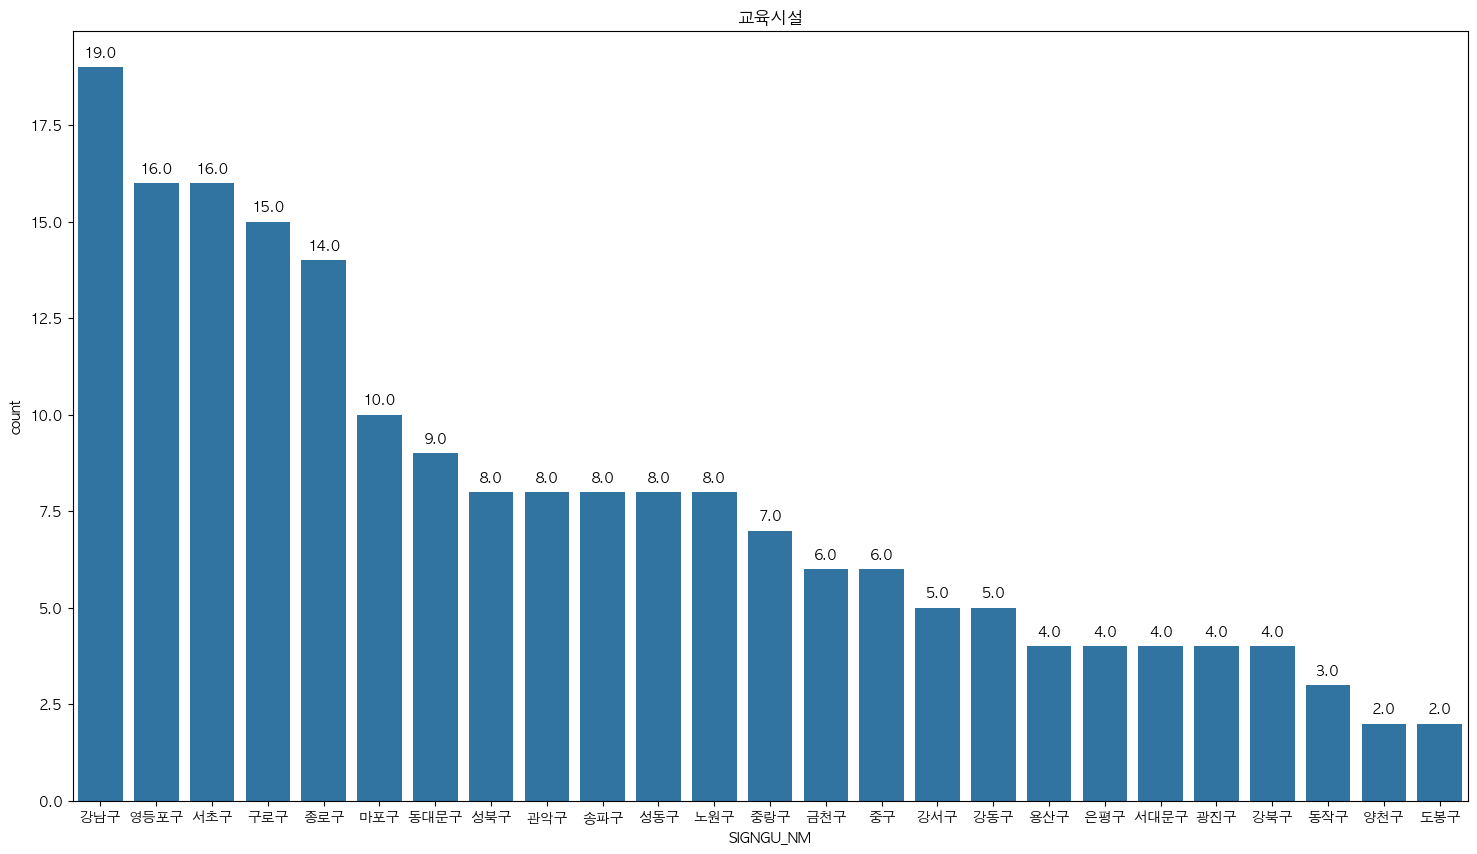

In [56]:
# SIGNGU_NM의 카테고리별 개수를 계산하고 오름차순으로 정렬
order = edu['SIGNGU_NM'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(18, 10))
ax = sns.countplot(data=edu, x='SIGNGU_NM', order=order)

# 값 레이블 추가
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title("교육시설")
plt.show()